In [2]:
# imports
from camo_worms_utils import *

Image name (shape) (intensity max, min, mean, std)

original (240, 720) (210, 0, 49.3, 34.8)


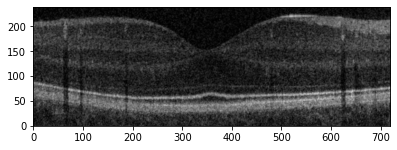

In [3]:
img = prep_image(IMAGE_DIR, IMAGE_NAME, MASK)

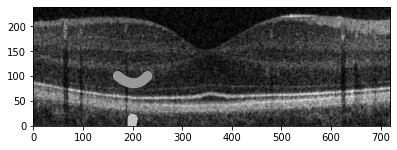

In [4]:
worm1 = Camo_Worm(200, 100, 30, 0, 30, 30, 10, 0.6)
worm2 = Camo_Worm(200, 13, 0.04, 2.65, 0.72, 1.95, 10, 0.76)
drawing = Drawing(img)
drawing.add_worms([worm1, worm2])
drawing.show()

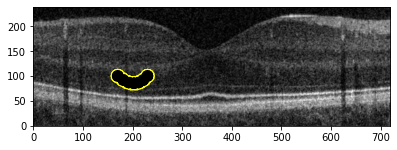

In [5]:
bigger_worm = Camo_Worm(worm1.x, worm1.y, worm1.r, worm1.theta, worm1.dr, worm1.dgamma, worm1.width*1.3, worm1.colour)
points_bigger = bigger_worm.points_in_worm(n_points_mod=1.5)
points_smaller = worm1.points_in_worm()
points = list(set(points_bigger) - set(points_smaller))
drawing = Drawing(img)
drawing.add_dots(points, 1, color="yellow")
drawing.add_dots(points_smaller, 1, color="black")
drawing.show()

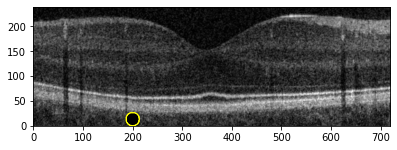

In [6]:
bigger_worm = Camo_Worm(worm2.x, worm2.y, worm2.r, worm2.theta, worm2.dr, worm2.dgamma, worm2.width*1.3, worm2.colour)
points_bigger = bigger_worm.points_in_worm()
points_smaller = worm2.points_in_worm()
points = list(set(points_bigger) - set(points_smaller))
drawing = Drawing(img)
drawing.add_dots(points, 1, color="yellow")
drawing.add_dots(points_smaller, 1, color="black")
# drawing.add_dots(points_bigger, 1, color="pink")
drawing.show()

### Test Colour Diff Around Worm vs Under

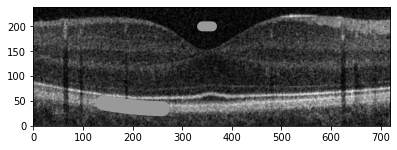

In [17]:
worm1 = Camo_Worm(200, 40, 60, -0.1, 5, 30, 15, 0.6)
worm2 = Camo_Worm(350, 200, 10, 0, 0, 0, 10, 0.6)
drawing = Drawing(img)
drawing.add_worms([worm1, worm2])
drawing.show()

We should expect worm2 to have virtually no colour diff around and worm1 to have high colour diff around

Colour Difference Around vs Under: 0.07270410192010363


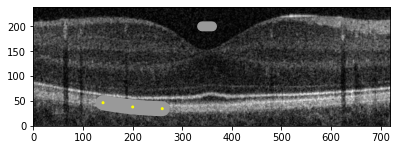

In [18]:
colours_under = worm1.get_colour_under(img)
colours_around = worm1.get_colour_around(img)
colour_diff_around = np.abs(np.mean(colours_under) - np.mean(colours_around))

print(f"Colour Difference Around vs Under: {colour_diff_around}")

drawing = Drawing(img)
drawing.add_worms([worm1, worm2])
drawing.add_dots(worm1.intermediate_points(3), 2, color="yellow")
drawing.show()

Colour Difference Around vs Under: 0.0007756933538615937


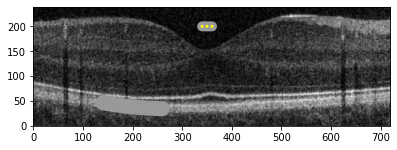

In [19]:
colours_under = worm2.get_colour_under(img)
colours_around = worm2.get_colour_around(img)
colour_diff_around = np.abs(np.mean(colours_under) - np.mean(colours_around))

print(f"Colour Difference Around vs Under: {colour_diff_around}")

drawing = Drawing(img)
drawing.add_worms([worm1, worm2])
drawing.add_dots(worm2.intermediate_points(3), 2, color="yellow")
drawing.show()